In [1]:
from tools.Simulate import Simulate
sac = Simulate(N_rows=1000)
sac.create_master_df()
sac.generate_ac_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ALPHA = 0.5

In [3]:
data = pd.read_pickle("data/data_frame/master_dataframe.pkl")
healthy = data[data[0]==0].iloc[:,1:]
faulty = data[data[0]==1].iloc[:,1:]

In [4]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
dx1 = 3000
dx2 = 4500

normalized_df = (data - data.min()) / (data.max() - data.min())
healthy_norm = normalized_df[normalized_df[0]==0].iloc[:,1:]
healthy_norm = healthy_norm.iloc[:,dx1:dx2]

means = []
for i in range(len(healthy_norm)):
    curr = healthy_norm.iloc[i,:]
    mean = np.sum((healthy_norm - curr)**2, axis = 1) ** 0.5
    means.append(np.mean(mean))
means = np.array(means)

mmeans = []
faulty_norm = normalized_df[normalized_df[0]==1].iloc[:,1:]
faulty_norm = faulty_norm.iloc[:,dx1:dx2]
for i in range(len(faulty_norm)):
    curr = faulty_norm.iloc[i,:]
    mean = np.sum((faulty_norm - curr)**2, axis = 1) ** 0.5
    mmeans.append(np.mean(mean))
mmeans = np.array(mmeans)

In [5]:
np.sort(means)

array([ 0.83491241,  0.83948642,  0.84199705,  0.84345511,  0.84422688,
        0.84469265,  0.8450897 ,  0.84569113,  0.84580984,  0.84584131,
        0.84637895,  0.84688158,  0.84707806,  0.84738873,  0.84823136,
        0.84833407,  0.84836997,  0.84850947,  0.84858493,  0.84876606,
        0.8494673 ,  0.8495839 ,  0.84973231,  0.85014458,  0.85048767,
        0.85078163,  0.85180138,  0.85190392,  0.85205508,  0.85220113,
        0.85220757,  0.8523748 ,  0.85242147,  0.85252611,  0.85294648,
        0.85318818,  0.85353034,  0.85360447,  0.85365267,  0.85399438,
        0.85409016,  0.85441215,  0.85442856,  0.85485066,  0.85492959,
        0.85497502,  0.85500818,  0.85501482,  0.85518624,  0.8554648 ,
        0.85666924,  0.85682361,  0.85714408,  0.85740495,  0.85743799,
        0.85760893,  0.85778318,  0.85796034,  0.85830466,  0.85841178,
        0.85887576,  0.85964679,  0.8599362 ,  0.8600542 ,  0.8601613 ,
        0.86069631,  0.86069668,  0.86077568,  0.86153836,  0.86

In [6]:
np.sort(mmeans)

array([ 3.02363936,  3.03656779,  3.03821894,  3.04068751,  3.0409146 ,
        3.05272548,  3.05562648,  3.05907709,  3.06045876,  3.06206857,
        3.06406906,  3.06554144,  3.06645709,  3.0680378 ,  3.07710941,
        3.07987569,  3.08717517,  3.08877363,  3.09078434,  3.09276226,
        3.09387736,  3.09568101,  3.09641319,  3.10972676,  3.1097726 ,
        3.11315727,  3.1188444 ,  3.11967527,  3.12483042,  3.12490933,
        3.13172571,  3.13373508,  3.13457441,  3.13809047,  3.14283883,
        3.14497282,  3.14730612,  3.15006802,  3.15481633,  3.15955908,
        3.1621965 ,  3.16532244,  3.16844011,  3.16877664,  3.16994328,
        3.17408616,  3.17538543,  3.17562781,  3.18423768,  3.18432017,
        3.18995195,  3.19269384,  3.19511158,  3.19704994,  3.20318688,
        3.20773511,  3.20821465,  3.20948099,  3.20958281,  3.21419309,
        3.21470191,  3.21696057,  3.21701994,  3.22128661,  3.22263692,
        3.22531844,  3.2294849 ,  3.23017521,  3.23046163,  3.23

Text(48.99999999999999, 0.5, 'Watts')

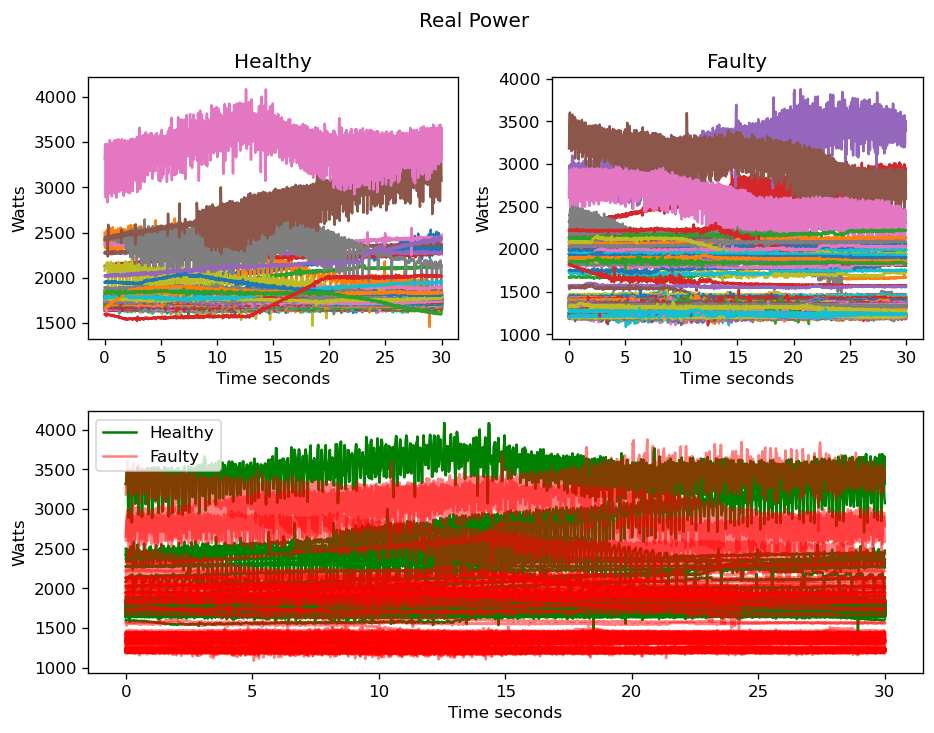

In [7]:
plt.figure(figsize=(8, 6), dpi=120)
plt.suptitle("Real Power")
time = np.linspace(0,30,1500)

# Healthy
plt.subplot(2, 2, 1)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, :1500])
plt.title("Healthy")
plt.xlabel('Time seconds')
plt.ylabel('Watts')

# Faulty
plt.subplot(2, 2, 2)
plt.tight_layout()
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, :1500])
plt.title("Faulty")
plt.xlabel('Time seconds')
plt.ylabel('Watts')

# Both
plt.subplot(2, 1, 2)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, :1500], 'green')
plt.plot(time, healthy.iloc[i, :1500], 'green', label='Healthy')
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, :1500], 'red', alpha=ALPHA)
plt.plot(time, faulty.iloc[i, :1500], 'red', label='Faulty', alpha=ALPHA)
plt.legend(loc = 'best')
plt.xlabel('Time seconds')
plt.ylabel('Watts')

Text(48.99999999999999, 0.5, 'Volt-ampere reactive')

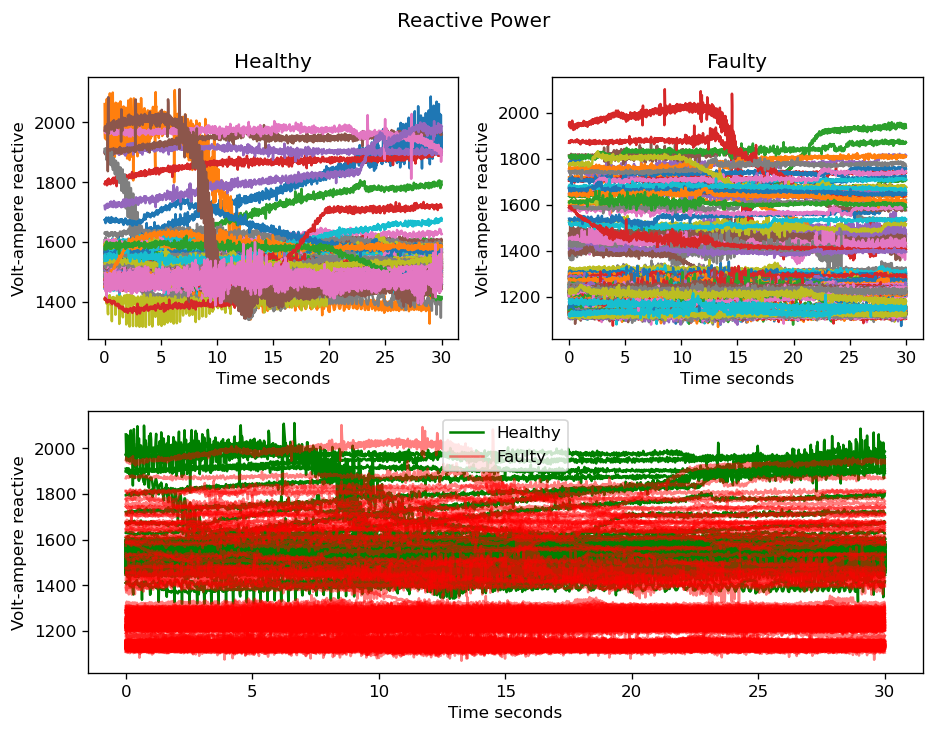

In [8]:
plt.figure(figsize=(8, 6), dpi=120)
plt.suptitle("Reactive Power")
time = np.linspace(0,30,1500)

# Healthy
plt.subplot(2, 2, 1)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, 1500:3000])
plt.title("Healthy")
plt.xlabel('Time seconds')
plt.ylabel('Volt-ampere reactive')

# Faulty
plt.subplot(2, 2, 2)
plt.tight_layout()
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, 1500:3000])
plt.title("Faulty")
plt.xlabel('Time seconds')
plt.ylabel('Volt-ampere reactive')

# Both
plt.subplot(2, 1, 2)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, 1500:3000], 'green')
plt.plot(time, healthy.iloc[i, 1500:3000], 'green', label='Healthy')
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, 1500:3000], 'red', alpha=ALPHA)
plt.plot(time, faulty.iloc[i, 1500:3000], 'red', label='Faulty', alpha=ALPHA)
plt.legend(loc = 'best')
plt.xlabel('Time seconds')
plt.ylabel('Volt-ampere reactive')

Text(33.00000000000001, 0.5, 'Total Harmonic Distortion')

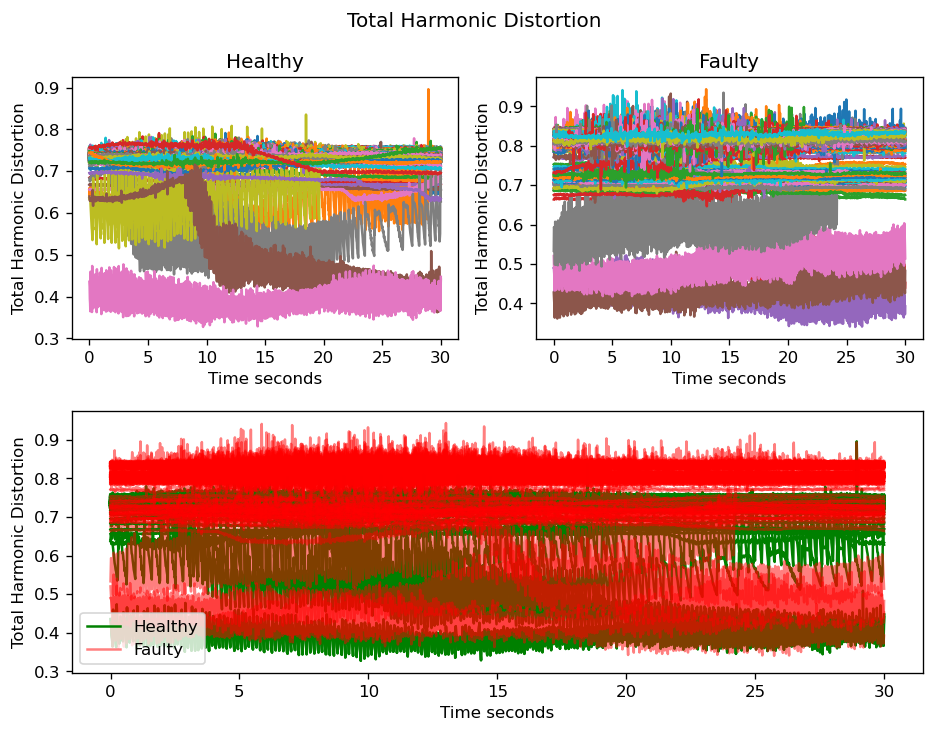

In [9]:
plt.figure(figsize=(8, 6), dpi=120)
plt.suptitle("Total Harmonic Distortion")
time = np.linspace(0,30,1500)

# Healthy
plt.subplot(2, 2, 1)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, 3000:])
plt.title("Healthy")
plt.xlabel('Time seconds')
plt.ylabel('Total Harmonic Distortion')

# Faulty
plt.subplot(2, 2, 2)
plt.tight_layout()
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, 3000:])
plt.title("Faulty")
plt.xlabel('Time seconds')
plt.ylabel('Total Harmonic Distortion')

# Both
plt.subplot(2, 1, 2)
plt.tight_layout()
for i in range(len(healthy)):
    plt.plot(time, healthy.iloc[i, 3000:], 'green')
plt.plot(time, healthy.iloc[i, 3000:], 'green', label='Healthy')
for i in range(len(faulty)):
    plt.plot(time, faulty.iloc[i, 3000:], 'red', alpha=ALPHA)
plt.plot(time, faulty.iloc[i, 3000:], 'red', label='Faulty', alpha=ALPHA)
plt.legend(loc = 'best')
plt.xlabel('Time seconds')
plt.ylabel('Total Harmonic Distortion')